<a href="https://colab.research.google.com/github/POORNI-AIDA/cd/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#Importing the datasets

In [ ]:
r=pd.read_csv("Cars-RF.csv")
r

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
r.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
r.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [ ]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
r.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
r.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
r.shape

(1727, 7)

In [ ]:
r.describe().T

,count,unique,top,freq
vhigh,1727,4,high,432
vhigh.1,1727,4,high,432
2,1727,4,3,432
2.1,1727,3,4,576
small,1727,3,med,576
low,1727,3,med,576
unacc,1727,4,unacc,1209


In [ ]:
r.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [ ]:
print(r.describe())

       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209


In [ ]:
columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
for col in r.columns:
    print(r[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: vhigh, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: vhigh.1, dtype: int64
3        432
4        432
5more    432
2        431
Name: 2, dtype: int64
4       576
more    576
2       575
Name: 2.1, dtype: int64
med      576
big      576
small    575
Name: small, dtype: int64
med     576
high    576
low     575
Name: low, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64


In [ ]:
r.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
car=pd.read_csv('Cars-RF.csv',names=columns)
car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
X = car.drop('class', axis=1)
y = car['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
od = OrdinalEncoder()
X_train_enc = od.fit_transform(X_train)
X_test_enc = od.transform(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_enc, y_train)

RandomForestClassifier()

In [ ]:
n_estimators = 100
rf_classifier = RandomForestClassifier(n_estimators=n_estimators)
rf_classifier.fit(X_train_enc, y_train)

RandomForestClassifier()

In [ ]:
feature_importances_rf = rf.feature_importances_
feature_importances_rf

array([0.20837824, 0.14603842, 0.06448685, 0.21425951, 0.0834351 ,
       0.28340188])

In [ ]:
feature_importances__rf_classifier = rf_classifier.feature_importances_
feature_importances__rf_classifier

array([0.18516398, 0.15789876, 0.06737964, 0.22032496, 0.08909617,
       0.28013648])

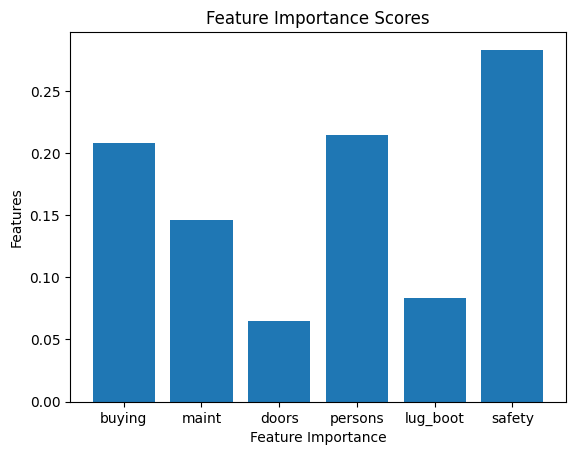

In [ ]:
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importances_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

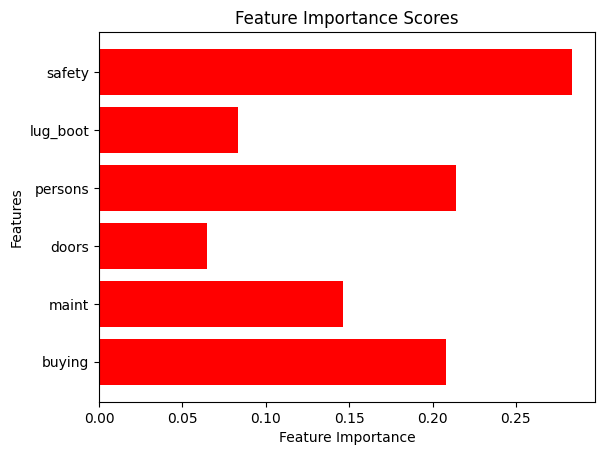

In [ ]:
import matplotlib.pyplot as plt
plt.barh(X.columns, feature_importances_rf,color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
select = ['maint', 'safety']
X_train_select = X_train_enc[:, [X.columns.get_loc(col) for col in select]]
X_test_select = X_test_enc[:, [X.columns.get_loc(col) for col in select]]
rf_selected = RandomForestClassifier()
rf_selected.fit(X_train_select, y_train)

RandomForestClassifier()

In [ ]:
y_pred_select = rf_selected.predict(X_test_select)
print(confusion_matrix(y_test, y_pred_select))

[[ 10   0  73   0]
 [  1   0  10   0]
 [ 11   0 224   0]
 [ 11   0   6   0]]


In [ ]:
print(classification_report(y_test, y_pred_select))

              precision    recall  f1-score   support

         acc       0.30      0.12      0.17        83
        good       0.00      0.00      0.00        11
       unacc       0.72      0.95      0.82       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.25      0.27      0.25       346
weighted avg       0.56      0.68      0.60       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_select)
print("Accuracy:", accuracy)

Accuracy: 0.6763005780346821


In [ ]:
recall = recall_score(y_test, y_pred_select, average='macro')
print("Recall:", recall)

Recall: 0.26841835426813637


In [ ]:
recall = recall_score(y_test, y_pred_select, average='micro')
print("Recall:", recall)

Recall: 0.6763005780346821


In [ ]:
recall = recall_score(y_test, y_pred_select, average='weighted')
print("Recall:", recall)

Recall: 0.6763005780346821


In [ ]:
precision = precision_score(y_test, y_pred_select,average='macro')
print("Precision:", precision)

Precision: 0.25467131377674507


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
precision = precision_score(y_test, y_pred_select,average='micro')
print("Precision:", precision)

Precision: 0.6763005780346821


In [ ]:
precision = precision_score(y_test, y_pred_select,average='weighted')
print("Precision:", precision)

Precision: 0.5587584649986541


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score = f1_score(y_test, y_pred_select,average='macro')
print("F1_Score:", f1_score)

F1_Score: 0.2474830103196577
